# **CANCER PREDICTION**

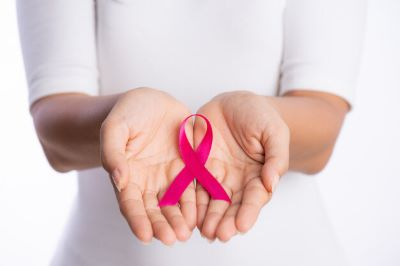

The dataset provided appears to be a subset of the Breast Cancer Wisconsin (Diagnostic) Dataset, which is commonly used for machine learning and statistical analysis in predicting breast cancer. The target variable is diagnosis, which indicates whether the tumor is benign (0) or malignant (1).

# Importing Python libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score
import warnings

# Importing Dataset

In [47]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/cancer_data (2).csv')
df


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
df.shape

(569, 6)

# Data Preprocessing

In [ ]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [49]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [ ]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

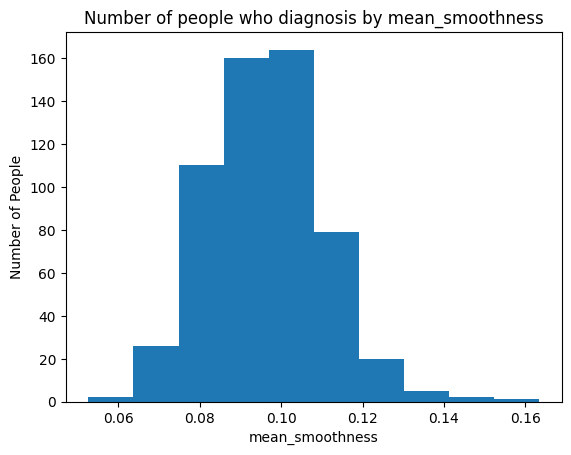

In [51]:
plt.hist(df['mean_smoothness'].to_list())
plt.title('Number of people who diagnosis by mean_smoothness')
plt.xlabel('mean_smoothness')
plt.ylabel('Number of People')
plt.show()

# Seperating Features and Target

In [ ]:
x=df.drop(columns='diagnosis')
y=df['diagnosis']

# Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

# Scaling

In [ ]:
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.fit_transform(x_test)

# Model creation

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
naive=MultinomialNB()
decision=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
ada=AdaBoostClassifier()

In [ ]:
model1=[knn,svc,decision,rf,gbc,xgb,ada]
for model in model1:
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  print(model)
  print('Accuracy_Score:',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print('------------------------------------------------------------------')

KNeighborsClassifier(metric='euclidean', n_neighbors=30)
Accuracy_Score: 94.15204678362574
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        67
           1       0.92      0.99      0.95       104

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

------------------------------------------------------------------
SVC()
Accuracy_Score: 94.15204678362574
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        67
           1       0.93      0.98      0.95       104

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

------------------------------------------------------------------
DecisionTreeClassifier()
Accuracy_Score: 88.30409356725146
              precisio